In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys

In [2]:
sys.path.append('..\src')
from bf_quantum_state import BFQuantumState
from tfim_hamiltonian_open_fermion import TfimHamiltonianOpenFermion

In [3]:
# calculate entanglement entropy for different ratios h/J

def calc_entanglement_entropy(qubit_num: int):
    ratios = np.array([0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 2, 5, 10, 20, 50, 100])
    entropies = np.zeros(np.size(ratios))
    for j in range(0, np.size(ratios)):
        ground_state = TfimHamiltonianOpenFermion(qubit_num, ratios[j], 1, 'open').ground_state_wavevector()
        entropies[j] = BFQuantumState(qubit_num, ground_state).entanglement_entropy()
    save_direc = 'data\Entanglement_entropy_brute_force\entropies_for qubit number ' + str(qubit_num)
    np.savetxt(save_direc, entropies)

In [4]:
def plot_entanglement_entropy(qubit_num: int):
    ratios = np.array([0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 2, 5, 10, 20, 50, 100])
    save_direc = 'data\Entanglement_entropy_brute_force\entropies_for qubit number ' + str(qubit_num)
    entropies = np.loadtxt(save_direc)
    plt.scatter(ratios, entropies)
    plt.xscale('log')
    plt.yscale('log')
    plt.title('entanglement entropy for different ratios h/J for ' + str(qubit_num) + ' qubits')
    plt.xlabel('ratio h/J')
    plt.ylabel('entanglement entropy')
    plot_save_direc = 'plots\Entanglement_entropy_brute_force\entropies_for qubit number ' + str(qubit_num)
    plt.savefig(plot_save_direc)

In [5]:
calc_entanglement_entropy(16)

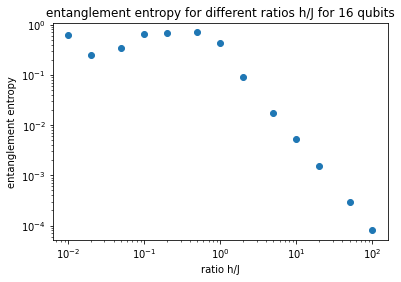

In [6]:
plot_entanglement_entropy(16)